# Goals

Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Analyze, prepare, and plot data in order to answer questions like:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

## To solve and show in the blog

The post should include the following:

- A compelling title about your findings
- An introduction to the data research
- A section sharing the background info (definition of GDP for example) and sources for your data as well as any further research you conducted
- An accompanying paragraph describing the following visualizations
- A conclusion touching on the limitations of the data and further research


Visualizations that can be included:

- The violin plot of the life expectancy distribution by country
- The facet grid of scatter graphs mapping GDP as a function of Life Expectancy by country
- The facet grid of line graphs mapping GDP by country
- The facet grid of line graphs mapping Life Expectancy by country

# Loading the data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.shape

(96, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [27]:
df.describe()
#uncommon column name 

,Year,LEABY,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


# Exploring the data

Which countries have the dataset?

In [10]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Years represented in the data: 2000-2015

In [11]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Rename the original column name 'Life expectancy at birth (years)' to LEABY

In [12]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})

In [13]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# First exploratory plots

Distribution of the `GDP` is skewed to the right, most of the values are on the left-hand side of the diagramm.

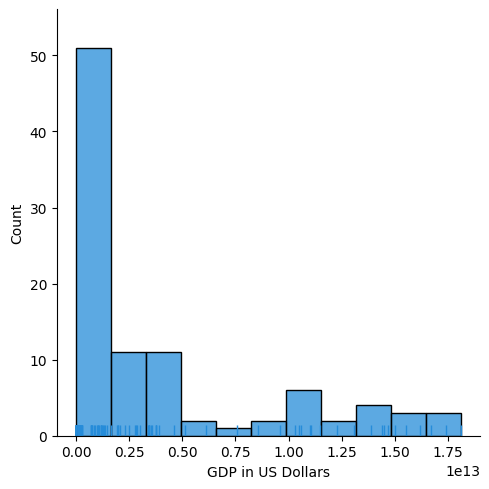

In [40]:
sns.displot(df.GDP, rug=True, color=(0.15,0.55,0.85))
plt.xlabel("GDP in US Dollars")
plt.show()

Distribution of the Life Expectancy is skewed to the left, most of the data are on the right-hand side of the diagramm. This is inverse of what we have observed in the `GDP` diagramm.

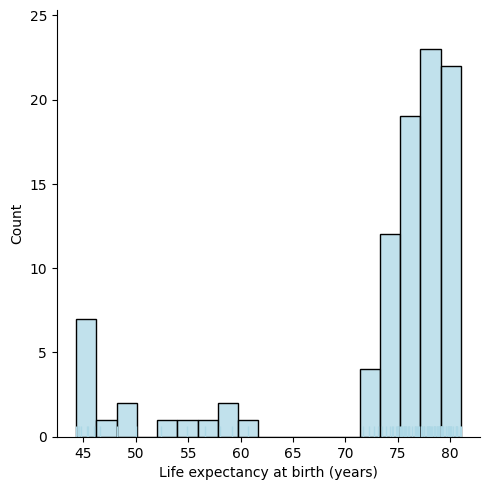

In [30]:
sns.displot(df.LEABY, rug=True, color='lightblue')
plt.xlabel("Life expectancy at birth (years)")
plt.show()

Calculating the average `GDP` and `LEABY`per country over the years range

In [46]:
df_means =(
    df.drop("Year", axis=1)
    .groupby("Country").mean()
    .reset_index()
)

In [48]:
df_means.head(10)

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Plotting horizontally the `Life Expectancy` for all of the countries. Zimbabwe has definetly the lowest value.

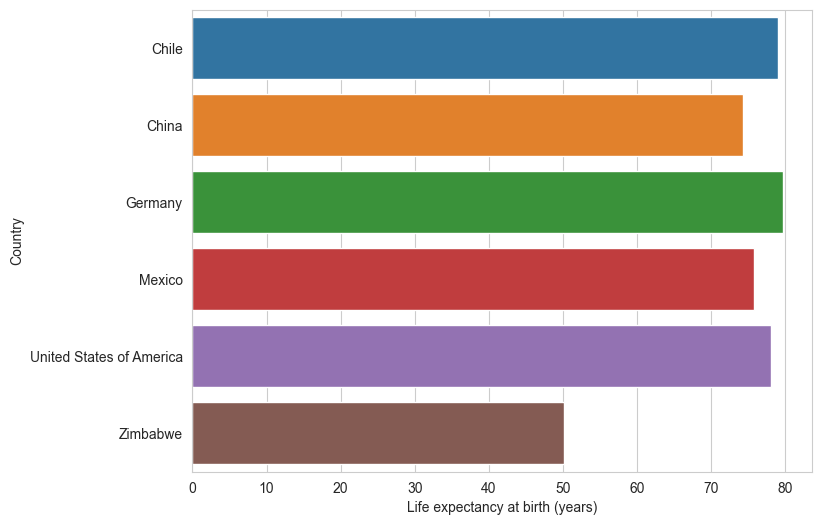

In [55]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.barplot(x=df_means.LEABY, y=df_means.Country)
plt.xlabel("Life expectancy at birth (years)")
plt.show()

Now plotting the average `GDP` by `Country`. The US has the highest `GDP`of the group, and Zimbabwe the lowest which is not even visible. The GDP of Chile can be barely seen, the others 3 countries have similar GDPs. 

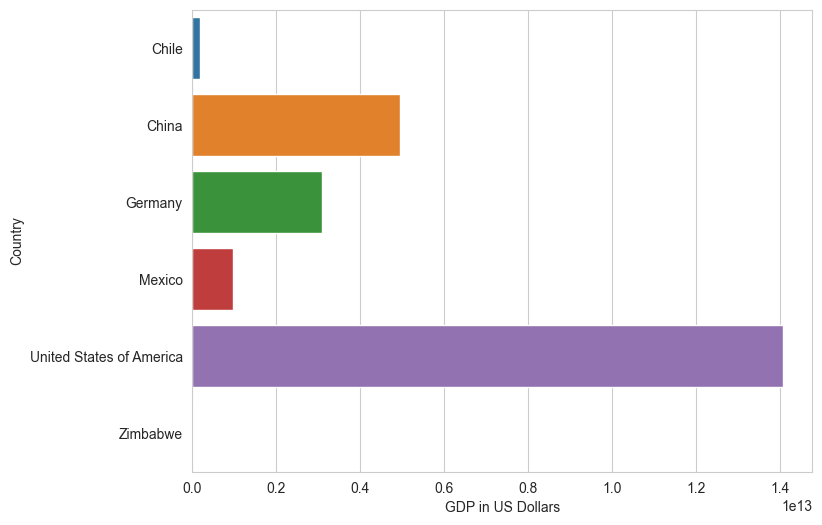

In [57]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.barplot(x=df_means.GDP, y=df_means.Country)
plt.xlabel("GDP in US Dollars")
plt.show()

## Violin Plots

Big economies like the USA and China have shown an increase in `GDP`over time. Chile and Zimbabwe have remained relatively constant. However, the `Life Expectancy` in Zimbabwe has increased tremendously over the same period, rising from just under 40 years to slightly over 65 years. The other countries have demostrated a rather stable evolution of `Life Expectancy`, with China being at the forefront.

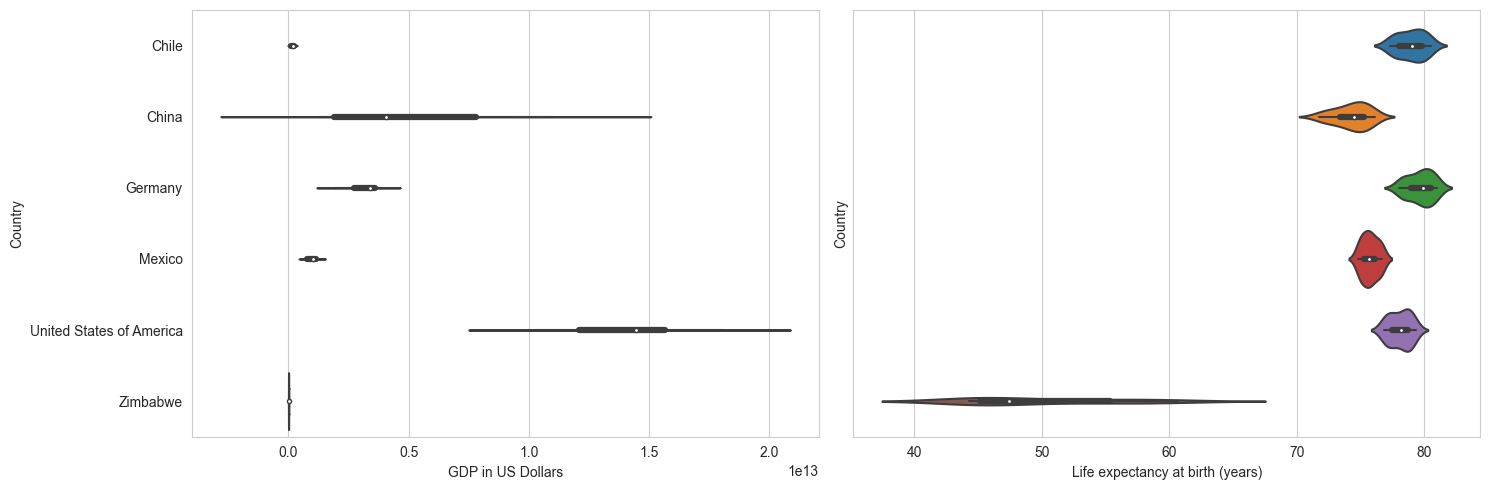

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
sns.violinplot(x=df.GDP, y=df.Country, ax=axes[0])
axes[0].set_xlabel("GDP in US Dollars")
sns.violinplot(x=df.LEABY, y=df.Country, ax=axes[1])
axes[1].set_xlabel("Life expectancy at birth (years)")
plt.tight_layout()
plt.show()

## Swarm Plots

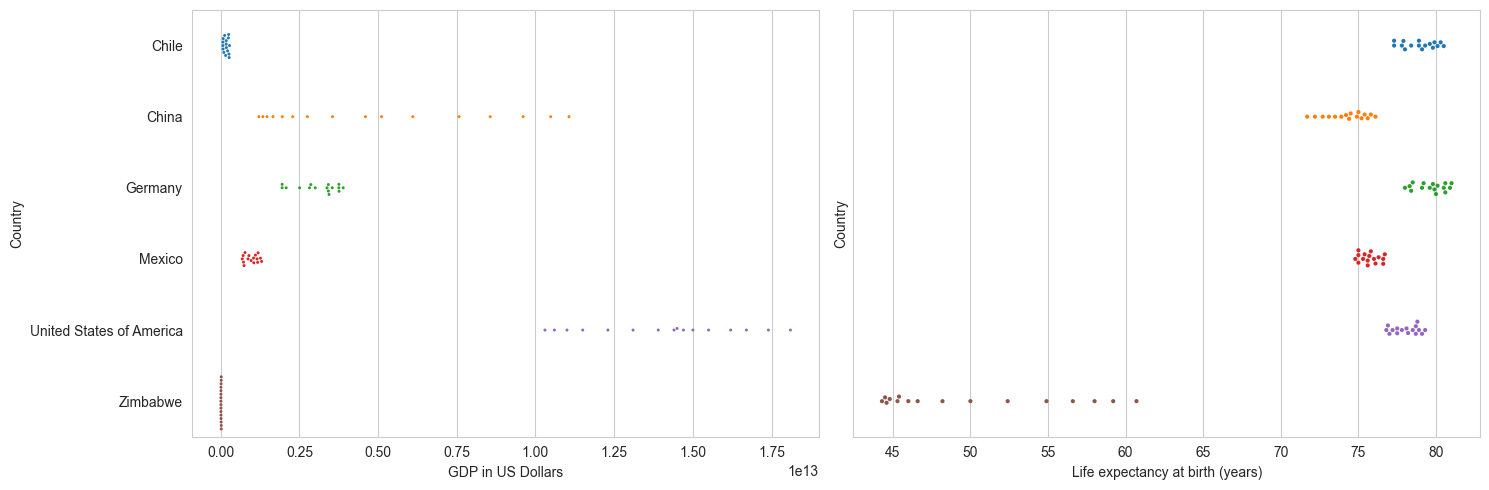

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
#sns.stripplot(x=df.GDP, y=df.Country, ax=axes[0])
sns.swarmplot(x=df.GDP, y=df.Country, ax=axes[0], size=2.15)
axes[0].set_xlabel("GDP in US Dollars")
#sns.stripplot(x=df.LEABY, y=df.Country, ax=axes[1])
sns.swarmplot(x=df.LEABY, y=df.Country, ax=axes[1], size=3)
axes[1].set_xlabel("Life expectancy at birth (years)")
plt.tight_layout()
plt.show()

## Joining Swarm and Violin Plots

/Users/luisvaras/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luisvaras/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


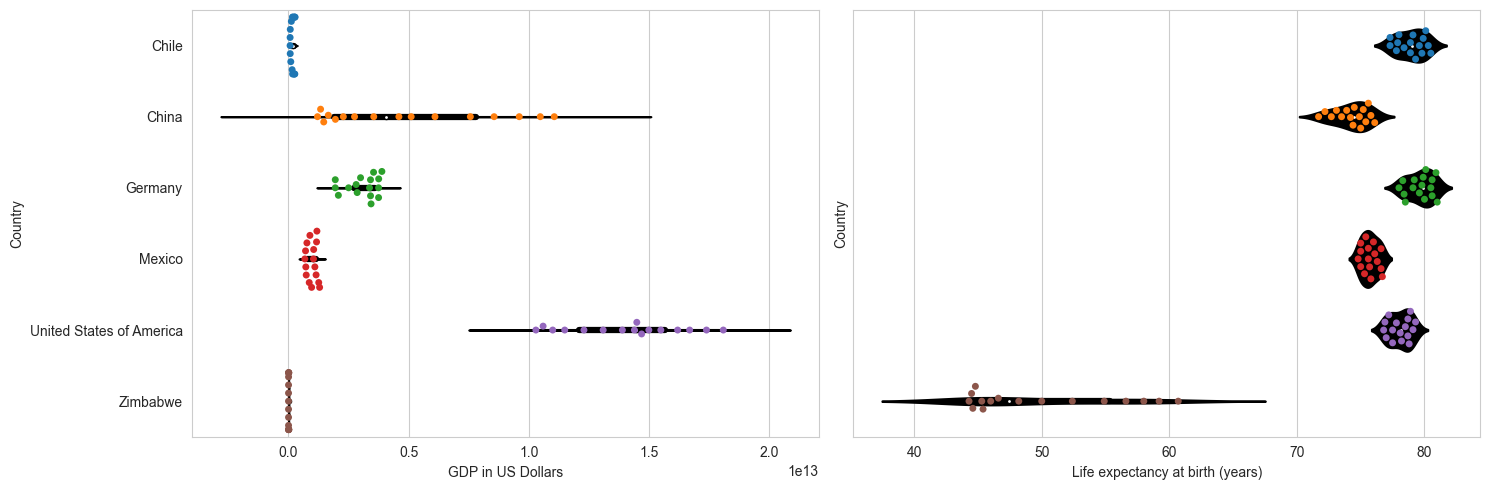

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

sns.violinplot(x=df.GDP, y=df.Country, ax=axes[0], color='black')
sns.swarmplot(x=df.GDP, y=df.Country, ax=axes[0])# , size=2.15)

axes[0].set_xlabel("GDP in US Dollars")

sns.violinplot(x=df.LEABY, y=df.Country, ax=axes[1], color='black')
sns.swarmplot(x=df.LEABY, y=df.Country, ax=axes[1])#, size=3)

axes[1].set_xlabel("Life expectancy at birth (years)")

plt.tight_layout()
plt.show()

## Line Charts

Showing the evolution of the `GDP` and the `LEABY` over the years.

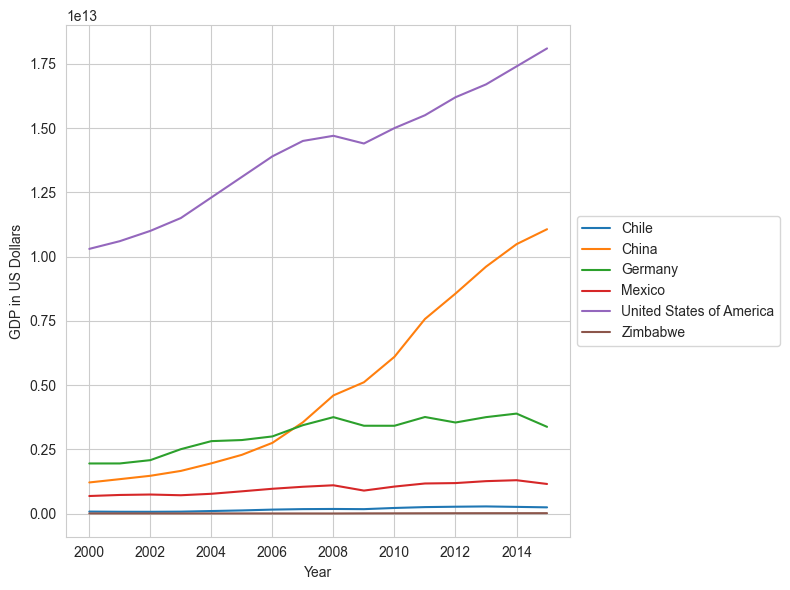

In [106]:
plt.figure(figsize=(8,6))

sns.set_style("whitegrid")

sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("GDP in US Dollars")
plt.xlabel("Year")

plt.tight_layout()
plt.show()


In previous diagramm it is not possible to see the evolution of GDP for the countries with a muche lower value of `GDP` compare to the USA. Now let's use a `FacetGrid`to separate the line charts of each country.

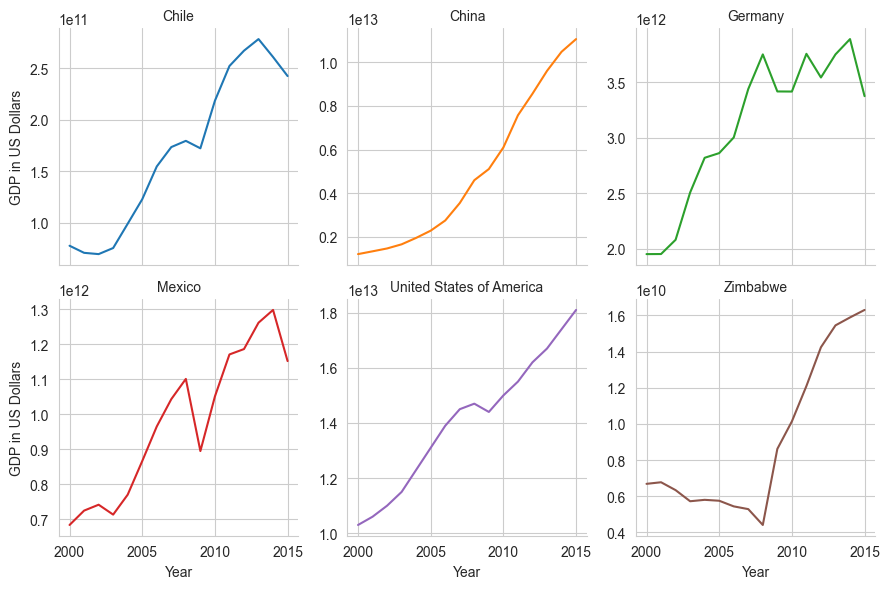

In [111]:
g = sns.FacetGrid(df, col="Country", col_wrap=3, sharey=False, hue='Country')

g.map(sns.lineplot, 'Year', 'GDP')
g.set_axis_labels('Year', 'GDP in US Dollars')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

Evolution of `Life Expectancy` for the countries in the time frame.

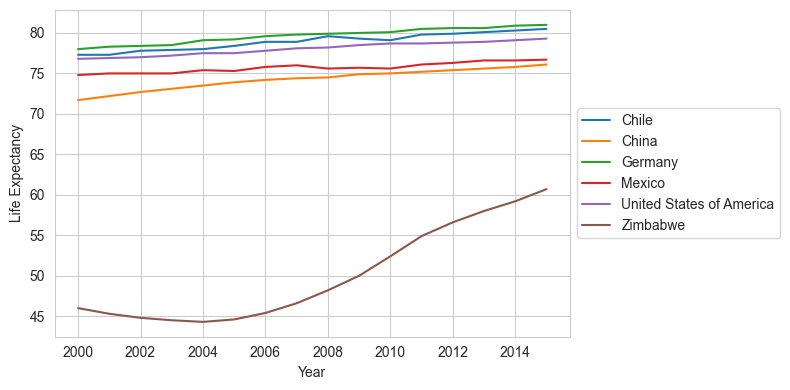

In [116]:
plt.figure(figsize=(8,4))

sns.set_style("whitegrid")

sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life Expectancy")
plt.xlabel("Year")

plt.tight_layout()
plt.show()


Only the change over time of the `Life Expectancy` of Zimbabwe can be shown. Let's separate in 6 different plots to see if the other countries have achieved an increase of the `Life Expectancy` over the time.

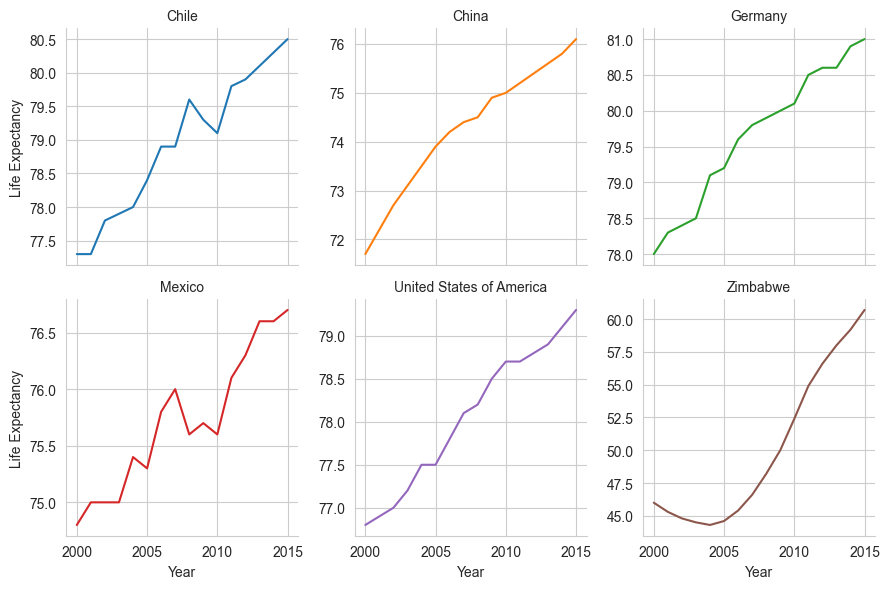

In [118]:
g = sns.FacetGrid(df, col="Country", col_wrap=3, sharey=False, hue='Country')

g.map(sns.lineplot, 'Year', 'LEABY')
g.set_axis_labels('Year', "Life Expectancy")
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

Zimbabwe shows slight decrease in `Life Expectancy` around 2005 and then a steep increase towards 2015.

The next higher increase in `Life Expectancy` has been reached in China, with almost 4 years. Followed by Chile that shows an increase of almost `3 years`

## Scatter Plot

Let's find out the relationship between `GDP` and `Life Expectancy` for each country.

Zimbabwe shows an increase of the `Life Expectancy` but no changes in the `GDP`. The other countries show an in increase in both over the years; with the highest increase shown by the USA and China.

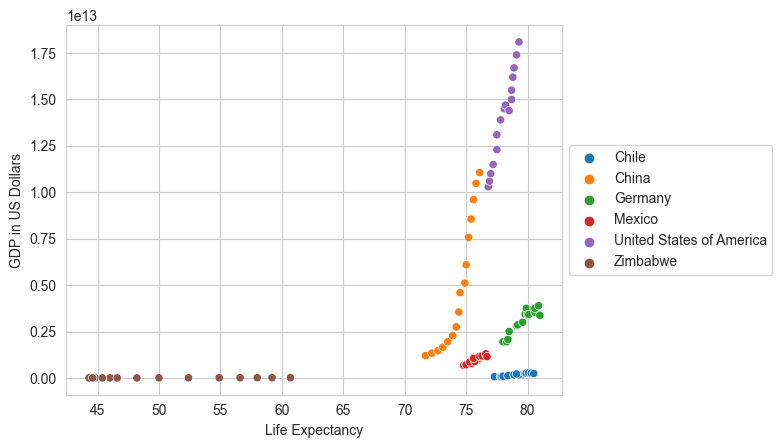

In [122]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Life Expectancy")
plt.ylabel("GDP in US Dollars")

plt.show()

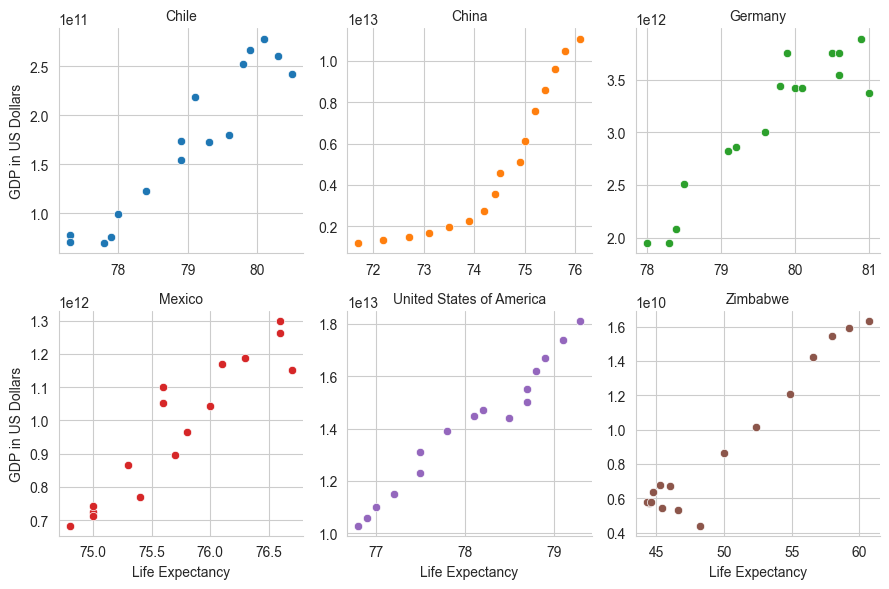

In [125]:
g = sns.FacetGrid(df, col="Country", col_wrap=3, sharey=False, sharex=False, hue='Country')

g.map(sns.scatterplot, 'LEABY', 'GDP')
g.set_axis_labels("Life Expectancy", "GDP in US Dollars")
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# Conclusions

We can answer the following questions as:

- Has life expectancy increased over time in the six nations?
    - Yes and Zimbabwe has the highest increase in this time
- Has GDP increased over time in the six nations?
    - GDP has increased over time for only 5 nations, except for Zimbabwe. The greatest increase are for China firstly, then for the USA.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a positive correlation between GDP and life expectancy of a country
- What is the average life expectancy in these nations?
    - All the countries have a life expectancy of around 70..75 years to 75..80 years, except for Zimbabwe which reached a max of almost 60 years.
- What is the distribution of that life expectancy?
    - The distribution is skewed to the left, with more values on the right-hand side of the disrtibution.